# Earth Engine Test

In [2]:
import ee

In [3]:
ee.Initialize()

## Example 1

In [4]:
collection = ee.ImageCollection('LANDSAT/LC8_L1T_TOA')

In [5]:
collection

In [7]:
collection = collection.filterDate("2010-01-01", "2020-01-01")

In [42]:
bands = ["B4", "B5", "B6"]

In [43]:
series = ee.ImageCollection(
    'LANDSAT/LC8_L1T_TOA'
).filterDate(
    "2010-01-01", "2020-01-01"
).filter(
    ee.Filter.eq("WRS_PATH", 198)
).filter(
    ee.Filter.eq("WRS_ROW", 24)
).filter(
    ee.Filter.lt("CLOUD_COVER", 10)
).select(
    bands
).toList(100)

In [44]:
series.size().getInfo()

16

In [45]:
region = ee.Geometry.Rectangle(
    [5.727906, 51.993435, 5.588144, 51.944356]
)

In [46]:
n_images = 10
images = [ee.Image(series.get(i)) for i in range(n_images)]

In [49]:
from IPython.display import Image

In [55]:
Image(
    url=images[0].getThumbUrl(
        {
            "min": 0,
            "max": 0.5,
            "bands": bands,
            "region": region
        }
    )
)

In [56]:
Image(
    url=images[1].getThumbUrl(
        {
            "min": 0,
            "max": 0.5,
            "bands": bands,
            "region": region
        }
    )
)

## to Arrays

In [64]:
import numpy

In [65]:
img_arrays = [
    numpy.array(
        ee.Image(
            series.get(1)
        ).sampleRectangle(
            region=region
        ).get(
            band
        ).getInfo() 
    )
    for band in bands
]

In [66]:
img_arrays = [numpy.expand_dims(img_array, 2) for img_array in img_arrays]

In [67]:
img = numpy.concatenate(img_arrays, 2)

In [69]:
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


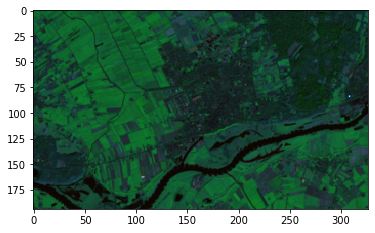

In [70]:
plt.imshow(img)